## Observations and Insights 

#Observations
-Distribution between gender is more or less approximately even. 
-Capomuline and Ramicane seem to be the most promising treatments with the most measurements taken and the smallest tumor volumes after treatment. Although all drugs have a number of measurements taken between 150-200, these two regimens draw the most focus. 
-There is a positive correlation between mouse weight and average tumor size. It is a moderate correlation having an r value around .52. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
#results_cleaned=study_results.duplicated(subset=['Mouse ID'])
#results_cleaned
#id g989


joined_df=pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview

cleaned_df=joined_df.loc[joined_df["Mouse ID"] != 'g989']
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice.
mice_count=cleaned_df["Mouse ID"].unique()
len(mice_count)
print(f"The total number of mice in the study is {len(mice_count)}.")

The total number of mice in the study is 248.


In [7]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 



In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
deleted_data=joined_df.loc[joined_df["Mouse ID"] == 'g989']
deleted_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.


In [10]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
drug_data=joined_df.groupby("Drug Regimen")
tumors= drug_data["Tumor Volume (mm3)"]
mean= drug_data["Tumor Volume (mm3)"].mean()
median= drug_data["Tumor Volume (mm3)"].median()
std_dev= drug_data["Tumor Volume (mm3)"].std()
std_var= drug_data["Tumor Volume (mm3)"].var()
sem= drug_data["Tumor Volume (mm3)"].sem()
summary_df= pd.DataFrame({"Mean": mean,
            "Median" : median,
            "Standard Deviation": std_dev,  
            "Variance": std_var,
             "SEM": sem})
summary_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#agg_data= drug_data.agg(['mean','median','st.std','st.var','st.sem'], drug_data["Tumor Volume (mm3)"])
agg_data= drug_data.agg({'Tumor Volume (mm3)' : ['mean', 'median','std','var','sem']})
agg_data

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.322552  50.854632  6.507770  42.351070  0.512884
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

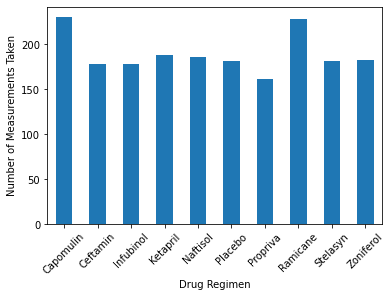

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements= drug_data["Tumor Volume (mm3)"].count()
drug_measurements.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements Taken')
plt.xticks(rotation=45)
plt.show()


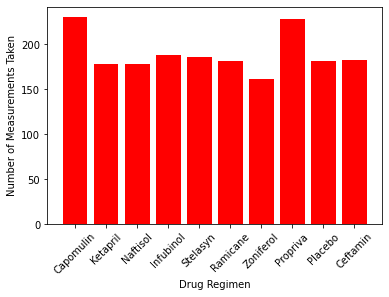

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_names= cleaned_df["Drug Regimen"].unique()
plt.bar(drug_names,drug_measurements, color='r', align= 'center')
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements Taken')
plt.show()


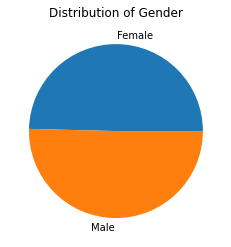

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data= cleaned_df.groupby(["Sex"])
gender_count= gender_data["Mouse ID"].nunique()
gender_count.name = ""
gender_count.plot(kind= 'pie', title=("Distribution of Gender"))

plt.show()


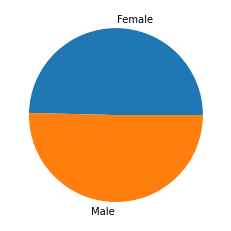

Text(0.5, 1.0, 'Distribution of Gender')

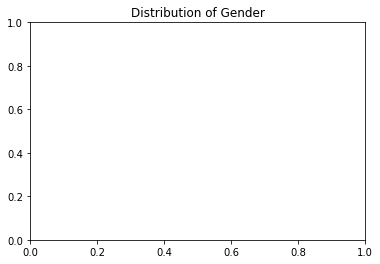

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count, labels= ["Female", "Male"])
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_df= cleaned_df.loc[cleaned_df["Drug Regimen"].isin(drug_list)]

#drug_df
# Start by getting the last (greatest) timepoint for each mouse
#mouse_check= drug_df['Mouse ID'].nunique()
#mouse_check
mouse_combined=drug_df[["Mouse ID", "Drug Regimen", "Timepoint"]].groupby("Mouse ID").max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tot_vol= pd.merge(study_results,mouse_combined, how= 'right', on=["Mouse ID", "Timepoint"])
tot_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen
0,u153,0,45.000000,0,Ceftamin
1,b447,0,45.000000,0,Ceftamin
2,x226,0,45.000000,0,Ceftamin
3,t573,0,45.000000,0,Ceftamin
4,c326,5,36.321346,0,Infubinol
...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane
96,i177,45,33.562402,3,Ramicane
97,r944,45,41.581521,2,Capomulin
98,u364,45,31.023923,3,Capomulin


In [25]:
# Put treatments into a list for a for loop (and later for plot labels)
#four treatments same as variable above


# Create empty list to fill with tumor vol data (for plotting)
#make a list
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for loop here
for drug in drug_list:
    #print(drug)
    mice_drug= tot_vol.loc[tot_vol["Drug Regimen"]== drug]
    get_tumor= mice_drug["Tumor Volume (mm3)"]
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    tumor_list.append(get_tumor)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
outlier_drug = tot_vol.loc[(tot_vol['Tumor Volume (mm3)'] < lower_bound) | (tot_vol['Tumor Volume (mm3)'] > upper_bound)]
#print(outlier_drug)

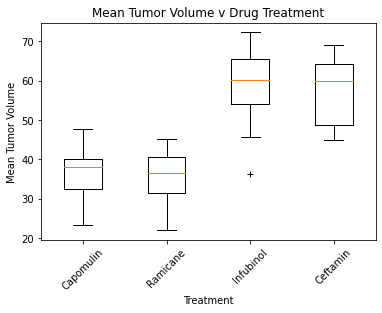

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Mean Tumor Volume v Drug Treatment')
ax1.set_ylabel('Mean Tumor Volume')
ax1.set_xlabel("Treatment")
ax1.set_xticklabels(drug_list, rotation=45)
ax1.boxplot(tumor_list, sym= '+')
plt.show()

## Line and Scatter Plots

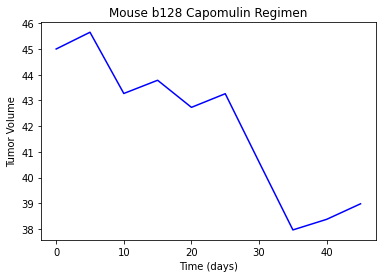

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice=cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Capomulin']
cap_one_mouse=cap_mice.loc[cap_mice["Mouse ID"] == 'b128']
cap_tumor_size= cap_one_mouse["Tumor Volume (mm3)"]
cap_time= cap_one_mouse["Timepoint"]
tumor_vol=plt.plot(cap_time, cap_tumor_size,color= 'blue', label='Tumor Volume')
plt.title('Mouse b128 Capomulin Regimen')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume")

plt.show()


In [29]:
cap_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


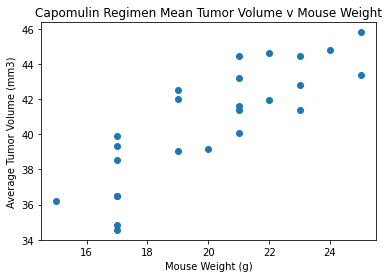

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_grouped=cap_mice.groupby("Mouse ID")
avg_tumor_vol= cap_grouped["Tumor Volume (mm3)"].mean()
mouse_weight= cap_grouped["Weight (g)"].max()
plt.scatter(mouse_weight,avg_tumor_vol)
plt.title('Capomulin Regimen Mean Tumor Volume v Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
#avg_tumor_vol


## Correlation and Regression

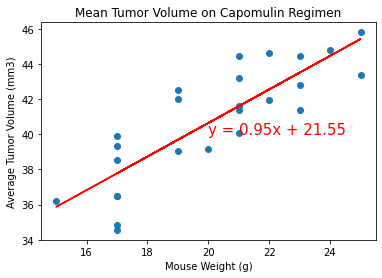

The correlation between mouse weight and average tumor volume is 0.525699555207717


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
corr_coeff= rvalue**2
correlation= st.pearsonr(cap_mice['Weight (g)'], cap_mice['Tumor Volume (mm3)'])
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight,regress_values,'r-')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title("Mean Tumor Volume on Capomulin Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The correlation between mouse weight and average tumor volume is {correlation[0]}")
